four fundamental ML algorithms
* Linear Regression
* Classification
* Clustering
* Hidden Markov Models

https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true&scrollTo=sIBZww6kOIAp

# Linear Regression
* predict numeric values
* if data points are related linearly, we can generate a line that best fit the points.

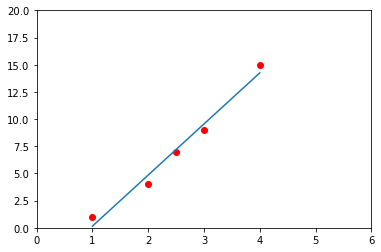

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [11]:
np.unique(x)

array([1. , 2. , 2.5, 3. , 4. ])

In [12]:
np.poly1d(np.polyfit(x, y, 1))(np.unique(x))

array([ 0.15,  4.85,  7.2 ,  9.55, 14.25])

In [13]:
np.poly1d(np.polyfit(x, y, 1))

poly1d([ 4.7 , -4.55])

In [14]:
(np.unique(x))

array([1. , 2. , 2.5, 3. , 4. ])

# load and visualize Titanic dataset

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [2]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [3]:
# Show the first five rows
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
# Show the stats
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [5]:
# set the labels for the train and test sets
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [6]:
print(dftrain.shape, y_train.shape)
print(dfeval.shape, y_eval.shape)

(627, 9) (627,)
(264, 9) (264,)


<AxesSubplot:>

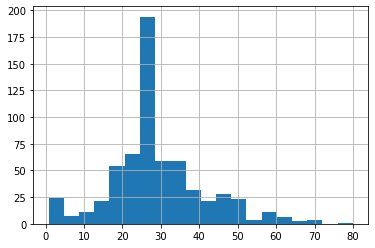

In [11]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

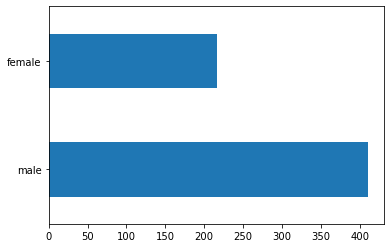

In [12]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

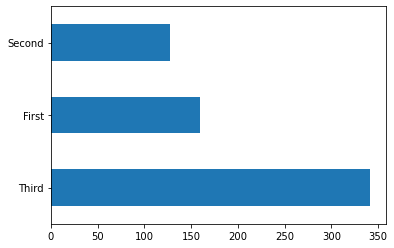

In [72]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

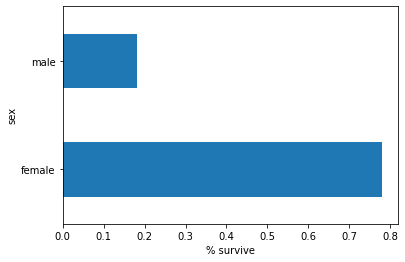

In [73]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

After analyzing this information, we should notice the following:
* Most passengers are in their 20's or 30's
* Most passengers are male
* Most passengers are in "Third" class
* females have a much higher chance of survival


1. load datasets
2. exploit the datasets
3. categorize the columns
4. train
5. eval

In [31]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

# linear_est.train(train_input_fn)  # train
# result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

# clear_output()  # clears consoke output
# print(result['accuracy'])  # the result variable is simply a dict of stats about our model

ImportError: cannot import name 'parameter_server_strategy_v2' from 'tensorflow.python.distribute' (C:\Users\JungWhoNam\anaconda3\envs\tf-cpu\lib\site-packages\tensorflow\python\distribute\__init__.py)